# Preliminaries

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

For a full explanation behind what I am doing, please read the accompanying paper located here:
https://www.dropbox.com/sh/vxhhzhmzdu0crr0/AABCWe028Cie89miAmzOVv_za?dl=0

# Efficient Eco Frontier

Below I give graphs showing the efficient eco frontier for selected rounds:

## List of Eco Sends

To begin, we import a .csv file containing information about the cost and eco of the various sends of the game

In [63]:
filepath = r"C:\Users\jonah\Downloads\eco_data_1_8.csv"
eco_data = pd.read_csv(filepath)
eco_data

,Send Name,Eco/6s,Cost/6s
0,Zero Send,0.00,0.00
1,Grouped Reds,7.50,150.00
2,Spaced Blues,4.00,60.00
3,Grouped Blues,11.00,240.00
4,Spaced Greens,6.78,93.91
5,Grouped Greens,21.00,525.00
6,Spaced Yellows,7.83,125.22
7,Grouped Yellows,40.00,1000.00
8,Spaced Pinks,10.00,186.67
9,Grouped Pinks,72.00,1800.00


In [64]:
##BloonSend class to make things a lot better
class BloonSend:
    def __init__(self, cost = 0, eco = 0, name = 'Zero Send'):
        self.cost = cost
        self.eco = eco
        self.name = name
    def is_dominated(self, other0, other1):
        a = (self.cost-other1.cost)/(other0.cost-other1.cost)
        if 0<=a<=1 and a*other0.eco+(1-a)*other1.eco>self.eco:
            return True
        return False
    def __repr__(self):
        return self.name



#R12 List: Zero, G_blues, G_greens, G_yellows, G_pinks, G_whites, G_blacks, G_purples, G_zebras, G_leads, S_rainbows
# this seems like just a test so imma comment this lol
## S_cost_R12 = np.array(eco_data['Eco/6s'])[[0,3,5,7,9,11,13,15,17,19,20]]

In [65]:
##############################
#R1 List:Zero, G_reds, S_Blues
## S_cost_R1 = np.array(eco_data['Eco/6s'])[[0,1,2]]  
## S_eco_R1 = np.array(eco_data['Cost/6s'])[[0,1,2]]
## S_names_R1 = np.array(eco_data['Send Name'])[[0,1,2]]
r1 = [BloonSend(eco_data['Cost/6s'][i], eco_data['Eco/6s'][i], eco_data['Send Name'][i]) for i in [0,1,2]]

########################################
#R2 List:Zero, G_reds, S_Blues, S_greens
# S_cost_R2 = np.array(eco_data['Eco/6s'])[[0,1,2,4]]  
# S_eco_R2 = np.array(eco_data['Cost/6s'])[[0,1,2,4]]
# S_names_R2 = np.array(eco_data['Send Name'])[[0,1,2,4]]
r2 = [BloonSend(eco_data['Cost/6s'][i], eco_data['Eco/6s'][i], eco_data['Send Name'][i]) for i in [0,1,2,4]]

####################################################
#R3 List: Zero, G_reds, G_Blues, S_greens, S_yellows
# S_cost_R3 = np.array(eco_data['Eco/6s'])[[0,1,3,4,6]]  
# S_eco_R3 = np.array(eco_data['Cost/6s'])[[0,1,3,4,6]]
# S_names_R3 = np.array(eco_data['Send Name'])[[0,1,3,4,6]]
r3 = [BloonSend(eco_data['Cost/6s'][i], eco_data['Eco/6s'][i], eco_data['Send Name'][i]) for i in [0,1,3,4,6]]

#############################################################
#R4 List: Zero, G_reds, G_Blues, S_greens, S_yellows, S_pinks
# S_cost_R4 = np.array(eco_data['Eco/6s'])[[0,1,3,4,6,8]]  
# S_eco_R4 = np.array(eco_data['Cost/6s'])[[0,1,3,4,6,8]]
# S_names_R4 = np.array(eco_data['Send Name'])[[0,1,3,4,6,8]]
r4 = [BloonSend(eco_data['Cost/6s'][i], eco_data['Eco/6s'][i], eco_data['Send Name'][i]) for i in [0,1,3,4,6,8]]

#######################################################################
#R5 List: Zero, G_reds, G_Blues, G_greens, S_yellows, S_pinks, S_whites
# S_cost_R5 = np.array(eco_data['Eco/6s'])[[0,1,3,5,6,8,10]]  
# S_eco_R5 = np.array(eco_data['Cost/6s'])[[0,1,3,5,6,8,10]]
# S_names_R5 = np.array(eco_data['Send Name'])[[0,1,3,5,6,8,10]]
r5 = [BloonSend(eco_data['Cost/6s'][i], eco_data['Eco/6s'][i], eco_data['Send Name'][i]) for i in [0,1,3,5,6,8,10]]

#################################################################################
#R6 List:  Zero, G_reds, G_Blues, G_greens, S_yellows, S_pinks, S_whites, S_blacks
# S_cost_R6 = np.array(eco_data['Eco/6s'])[[0,1,3,5,6,8,10,12]]
# S_eco_R6 = np.array(eco_data['Cost/6s'])[[0,1,3,5,6,8,10,12]]
# S_names_R6 = np.array(eco_data['Send Name'])[[0,1,3,5,6,8,10,12]]
r6 = [BloonSend(eco_data['Cost/6s'][i], eco_data['Eco/6s'][i], eco_data['Send Name'][i]) for i in [0,1,3,5,6,8,10,12]]

#################################################################################
#R7 List:  Zero, G_reds, G_Blues, G_greens, G_yellows, S_pinks, S_whites, S_blacks
# S_cost_R7 = np.array(eco_data['Eco/6s'])[[0,1,3,5,7,8,10,12]]
# S_eco_R7 = np.array(eco_data['Cost/6s'])[[0,1,3,5,7,8,10,12]]
# S_names_R7 = np.array(eco_data['Send Name'])[[0,1,3,5,7,8,10,12]]
r7 = [BloonSend(eco_data['Cost/6s'][i], eco_data['Eco/6s'][i], eco_data['Send Name'][i]) for i in [0,1,3,5,7,8,10,12]]

#################################################################################
#R8 List:  Zero, G_reds, G_Blues, G_greens, G_yellows, S_pinks, S_whites, S_blacks, S_purples
# S_cost_R8 = np.array(eco_data['Eco/6s'])[[0,1,3,5,7,8,10,12,14]]
# S_eco_R8 = np.array(eco_data['Cost/6s'])[[0,1,3,5,7,8,10,12,14]]
# S_names_R8 = np.array(eco_data['Send Name'])[[0,1,3,5,7,8,10,12,14]]
r8 = [BloonSend(eco_data['Cost/6s'][i], eco_data['Eco/6s'][i], eco_data['Send Name'][i]) for i in [0,1,3,5,7,8,10,12,14]]

#################################################################################
#R9 List:  Zero, G_reds, G_Blues, G_greens, G_yellows, G_pinks, S_whites, S_blacks, S_purples, S_zebras
# S_cost_R9 = np.array(eco_data['Eco/6s'])[[0,1,3,5,7,8,10,12,14,16]]
# S_eco_R9 = np.array(eco_data['Cost/6s'])[[0,1,3,5,7,8,10,12,14,16]]
# S_names_R9 = np.array(eco_data['Send Name'])[[0,1,3,5,7,8,10,12,14,16]]
r9 = [BloonSend(eco_data['Cost/6s'][i], eco_data['Eco/6s'][i], eco_data['Send Name'][i]) for i in [0,1,3,5,7,9,10,12,14,16]]

##################################################################################
#R10 List: Zero, G_reds, G_blues, G_greens, G_yellows, G_pinks, G_whites, G_blacks, S_purples, S_zebras, S_leads
# S_cost_R10 = np.array(eco_data['Eco/6s'])[[0,1,3,5,7,9,11,13,14,16,18]]
# S_eco_R10 = np.array(eco_data['Cost/6s'])[[0,1,3,5,7,9,11,13,14,16,18]]
# S_names_R10 = np.array(eco_data['Send Name'])[[0,1,3,5,7,9,11,13,14,16,18]]
r10 = [BloonSend(eco_data['Cost/6s'][i], eco_data['Eco/6s'][i], eco_data['Send Name'][i]) for i in [0,1,3,5,7,9,11,13,14,16,18]]

##################################################################################
#R11 List: Zero, G_reds, G_blues, G_greens, G_yellows, G_pinks, G_whites, G_blacks, G_purples, G_zebras, S_leads
# S_cost_R11 = np.array(eco_data['Eco/6s'])[[0,1,3,5,7,9,11,13,15,17,18]]
# S_eco_R11 = np.array(eco_data['Cost/6s'])[[0,1,3,5,7,9,11,13,15,17,18]]
# S_names_R11 = np.array(eco_data['Send Name'])[[0,1,3,5,7,9,11,13,15,17,18]]
r11 = [BloonSend(eco_data['Cost/6s'][i], eco_data['Eco/6s'][i], eco_data['Send Name'][i]) for i in [0,1,3,5,7,9,11,13,15,17,18]]

##################################################################################
#R12 List: Zero, G_blues, G_greens, G_yellows, G_pinks, G_whites, G_blacks, G_purples, G_zebras, G_leads, S_rainbows
# S_cost_R12 = np.array(eco_data['Eco/6s'])[[0,3,5,7,9,11,13,15,17,19,20]]
# S_eco_R12 = np.array(eco_data['Cost/6s'])[[0,3,5,7,9,11,13,15,17,19,20]]
# S_names_R12 = np.array(eco_data['Send Name'])[[0,3,5,7,9,11,13,15,17,19,20]]
r12 = [BloonSend(eco_data['Cost/6s'][i], eco_data['Eco/6s'][i], eco_data['Send Name'][i]) for i in [0,3,5,7,9,11,13,15,17,19,20]]

##################################################################################
#R13 List: Zero, G_greens, G_yellows, G_pinks, G_whites, G_blacks, G_purples, G_zebras, G_leads, G_rainbows, S_cerams
# S_cost_R13 = np.array(eco_data['Eco/6s'])[[0,5,7,9,11,13,15,17,19,21,22]]
# S_eco_R13 = np.array(eco_data['Cost/6s'])[[0,5,7,9,11,13,15,17,19,21,22]]
# S_names_R13 = np.array(eco_data['Send Name'])[[0,5,7,9,11,13,15,17,19,21,22]]
r13 = [BloonSend(eco_data['Cost/6s'][i], eco_data['Eco/6s'][i], eco_data['Send Name'][i]) for i in [0,5,7,9,11,13,15,17,19,21,22]]

###################################################################################
#R17 list: Zero, G_yellows, G_pinks, G_whites, G_blacks, G_purples, G_zebras, G_leads, G_rainbows
# S_cost_R17 = np.array(eco_data['Eco/6s'])[[0,7,9,11,13,15,17,19,21]]
# S_eco_R17 = np.array(eco_data['Cost/6s'])[[0,7,9,11,13,15,17,19,21]]
# S_names_R17 = np.array(eco_data['Send Name'])[[0,7,9,11,13,15,17,19,21]]
r17 = [BloonSend(eco_data['Cost/6s'][i], eco_data['Eco/6s'][i], eco_data['Send Name'][i]) for i in [0,7,9,11,13,15,17,19,21]]

###################################################################################
#R20 list: Zero, G_pinks, G_whites, G_blacks, G_purples, G_zebras, G_leads, G_rainbows
# S_cost_R20 = np.array(eco_data['Eco/6s'])[[0,9,11,13,15,17,19,21]]
# S_eco_R20 = np.array(eco_data['Cost/6s'])[[0,9,11,13,15,17,19,21]]
# S_names_R20 = np.array(eco_data['Send Name'])[[0,9,11,13,15,17,19,21]]
r20 = [BloonSend(eco_data['Cost/6s'][i], eco_data['Eco/6s'][i], eco_data['Send Name'][i]) for i in [0,9,11,13,15,17,19,21]]

#####################################################################################
# S_cost_master = [S_cost_R1, S_cost_R2, S_cost_R3, S_cost_R4, S_cost_R5, S_cost_R6, S_cost_R7, S_cost_R8, S_cost_R9, S_cost_R10, S_cost_R11, S_cost_R12, S_cost_R13, S_cost_R17, S_cost_R20]
# S_eco_master = [S_eco_R1, S_eco_R2, S_eco_R3, S_eco_R4, S_eco_R5, S_eco_R6, S_eco_R7, S_eco_R8, S_eco_R9, S_eco_R10, S_eco_R11, S_eco_R12, S_eco_R13, S_eco_R17, S_eco_R20]
# S_names_master = [S_names_R1, S_names_R2, S_names_R3, S_names_R4, S_names_R5, S_names_R6, S_names_R7, S_names_R8, S_names_R9, S_names_R10, S_names_R11, S_names_R12, S_names_R13, S_names_R17, S_names_R20]
master = [r1,r2,r3,r4,r5,r6,r7,r8,r9,r10,r11,r12,r13,r17,r20]
labels = [1,2,3,4,5,6,7,8,9,10,11,12,13,17,20]

## Function Definitions

In [66]:
def eco_arrange(BloonSendList):
        return sorted(BloonSendList, key = lambda send: send.cost)
print(eco_arrange(r1))

[Zero Send, Spaced Blues, Grouped Reds]


In [71]:
def efficient_frontier(BloonSendList):
    BloonSendList = eco_arrange(BloonSendList)
    #Given a list of eco sends, determine which pure sends belong to the efficient eco frontier
    
    eef = [0]
    
    #The list is assumed to be given in order of increasing cost and also contain the "zero send"
    #which is avaialable every round of the game
    
    i = 0
    while i < len(BloonSendList)-1:
        
        #Test remaining eco sends to determine which ones belong on the EEF
        slope = 0
        
        for j in range(i+1,len(BloonSendList)):
            test_val = (BloonSendList[j].eco - BloonSendList[i].eco)/(BloonSendList[j].cost - BloonSendList[i].cost)
            #print("Test value for index (" + str(i) + ", " + str(j) + "): " + str(test_val))
            if test_val > slope:
                slope = test_val
                index = j
                
        #When the correct index is discovered, append it to eef
        if index > i:
            eef.append(index)
            i = index
        else:
            #It is possible we may run out of eco sends to add to the frontier, in which case...
            break
        
        #print(eef)
        
    return eef

In [75]:
def eco_mix(intensity, BloonSendList):
    scale_factor = intensity - np.floor(intensity)
    index = int(np.floor(intensity)) + 1
    
    if index < len(BloonSendList):
        cost_val = scale_factor*BloonSendList[index].cost + (1 - scale_factor)*BloonSendList[index - 1].cost
        eco_val = scale_factor*BloonSendList[index].eco + (1 - scale_factor)*BloonSendList[index - 1].eco
    else:
        cost_val = BloonSendList[-1].cost
        eco_val = BloonSendList[-1].eco
    return BloonSend(cost_val, eco_val, f'This is a send')
print(eco_mix(2, r1))

This is a send


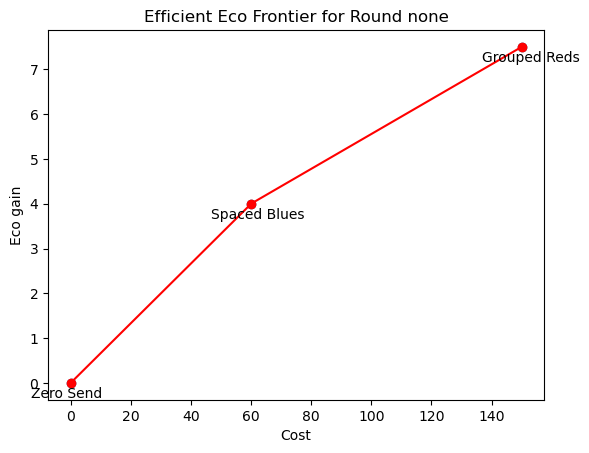

In [77]:
def graph_eef(BloonSendList, N = 10000, rd = "none"):
    #GOAL:######################################################################
    #Graph the efficient eco frontier corresponding to a collection of eco sends
    ############################################################################
    
    #First, arrange of the list of sends in order of increasing cost
    #S_cost_list, S_eco_list, S_names_list = eco_arrange(S_cost_list, S_eco_list, S_names_list)
    BloonSendList = eco_arrange(BloonSendList)
    
    #Next, determine the sends that make up the efficient eco frontier
    eef = efficient_frontier(BloonSendList)
    #print(eef)
    #print(S_cost_list[eef])
    #print(S_eco_list[eef])
    
    ## creating S_cost_list, S_eco_list, and S_names_list just cuz im a wimp lol
    S_cost_list = np.array([send.cost for send in BloonSendList])
    S_eco_list = np.array([send.eco for send in BloonSendList])
    S_names_list = np.array([send.name for send in BloonSendList])
    
    #Finally, build the graph corresponding to the eco sends
    M = len(eef)

    #Build the values we will use to graph the EEF line#
    x_val = []
    y_val = []
    for i in range(N):
        inp = (i/(N-1))*(M-1)
        #print(inp)
        #try:
        x_out,y_out = (send := eco_mix(inp, [BloonSendList[i] for i in eef])).cost, send.eco
        #except Exception as e:
        #    print(inp, eef, e)
        x_val.append(x_out)
        y_val.append(y_out)

    #Plot all eco sends
    plt.scatter(S_cost_list,S_eco_list)
    
    #Plot the eef with a different color
    plt.scatter(S_cost_list[eef],S_eco_list[eef], color = "red")

    annotations = S_names_list[eef]
    for i, label in enumerate(annotations):
        plt.annotate(label, (S_cost_list[eef][i], S_eco_list[eef][i]), xytext = (-40,-15), textcoords="offset pixels")

    plt.plot(x_val,y_val, color = "red")
    plt.ylabel("Eco gain")
    plt.xlabel("Cost")
    plt.title("Efficient Eco Frontier for Round " + str(rd))
    plt.rcParams['figure.figsize'] = [12, 8]
graph_eef(r1)

In [37]:
def domination(i, j, k):
    #####################
    #DEPRECATED FUNCTION#
    ## EVEN MORE DEPRECATED since theres now BloonSend.is_dominated() ##
    #####################
    
    #Determine if the eco send specified in index j is dominated by the eco sends of indexes i and k
    a = (S_cost[j] - S_cost[k])/(S_cost[i] - S_cost[k])
    
    if a*S_eco[i] + (1-a)*S_eco[k] > S_eco[j]:
        return True
    else:
        return False

## Graphs of the Efficient Eco Frontier

C:\Users\jonah\AppData\Local\Temp\ipykernel_20340\4089358316.py:17: RuntimeWarning: divide by zero encountered in double_scalars
  test_val = (BloonSendList[j].eco - BloonSendList[i].eco)/(BloonSendList[j].cost - BloonSendList[i].cost)


Text(0.5, 0.98, 'twitch.tv/redlaserbm')

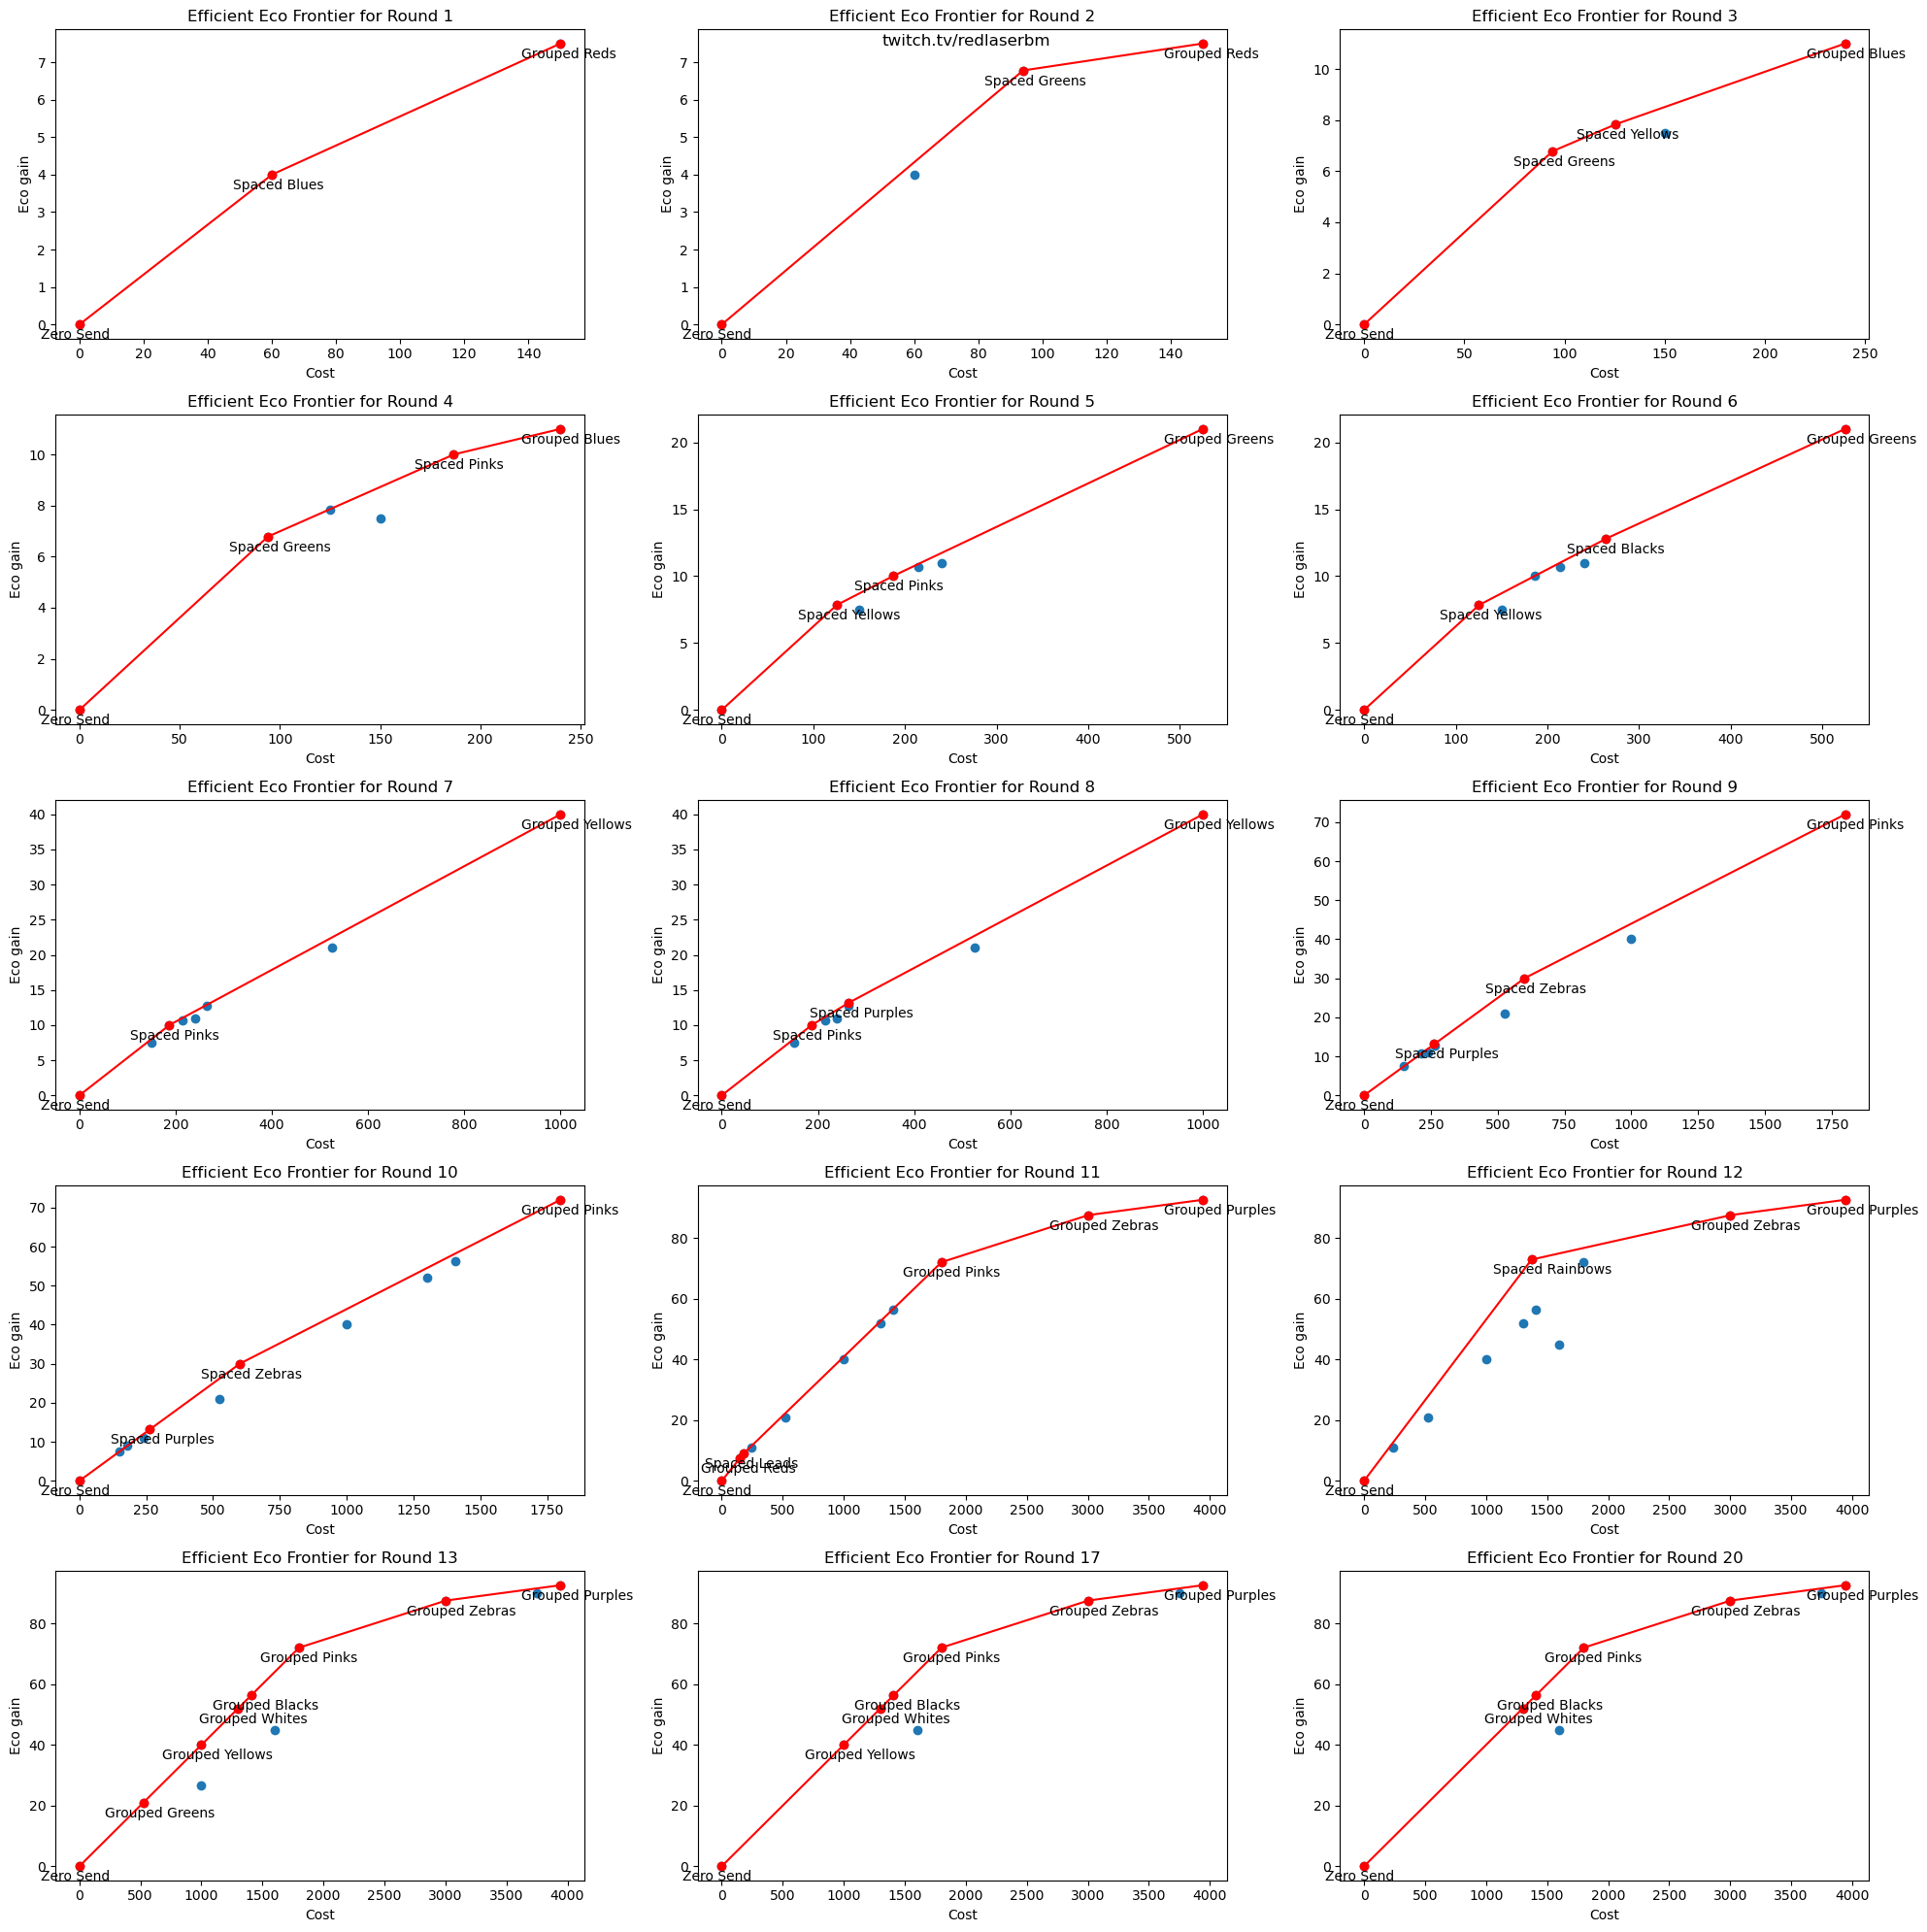

In [82]:
fig,ax = plt.subplots(int(np.ceil(len(master)/3)), 3)
N = 10000

for i in range(len(master)):
    q = int(np.mod(i,3))
    p = int(np.floor(i/3))

    BloonSendList = eco_arrange(master[i])
    
    ##im a wimp again
    S_cost_list = np.array([send.cost for send in BloonSendList])
    S_eco_list = np.array([send.eco for send in BloonSendList])
    S_names_list = np.array([send.name for send in BloonSendList])
    
    #Next, determine the sends that make up the efficient eco frontier
    eef = efficient_frontier(BloonSendList)
    #print(eef)
    #print(S_cost_list[eef])
    #print(S_eco_list[eef])
    
    #Finally, build the graph corresponding to the eco sends
    M = len(eef)

    #Build the values we will use to graph the EEF line#
    x_val = []
    y_val = []
    for j in range(N):
        inp = (j/(N-1))*(M-1)
        #print(inp)
        x_out,y_out = (send := eco_mix(inp, [BloonSendList[i] for i in eef])).cost, send.eco
        x_val.append(x_out)
        y_val.append(y_out)

    #Plot all eco sends
    ax[p,q].scatter(S_cost_list,S_eco_list)
    
    #Plot the eef with a different color
    ax[p,q].scatter(S_cost_list[eef],S_eco_list[eef], color = "red")

    annotations = S_names_list[eef]
    for j, label in enumerate(annotations):
        ax[p,q].annotate(label, (S_cost_list[eef][j], S_eco_list[eef][j]), xytext = (-40,-15), textcoords="offset pixels")

    ax[p,q].plot(x_val,y_val, color = "red")
    ax[p,q].set_ylabel("Eco gain")
    ax[p,q].set_xlabel("Cost")
    ax[p,q].set_title("Efficient Eco Frontier for Round " + str(labels[i]))
    

fig.set_size_inches(20,20)
fig.tight_layout()
fig.suptitle("twitch.tv/redlaserbm")

# The Sustainable Eco Problem

We say that an eco send $S = (S_{cost},S_{eco})$ is *sustainable* given a tuple of cash and eco $(C,E)$ provided that it is possible to sustain nonstop sending of $S$ given $(C,E)$. In this section of code, I compute given some value eco $E$, the minimum cash necessary to sustain nonstop eco'ing with eco send $S$.

In [94]:
def g(x, E, S_cost, S_eco):
    #Determine the hypothetical gain in money after x ticks of eco'ing assuming that eco'ing is possible 
    #even when we run out of money
    return x*(E - S_cost) + 0.5*S_eco*x*(x+1)

In [95]:
def cash_boundary(E,S_cost, S_eco):
    #Determine the minimum of cash needed to sustain an eco send that costs S_cost every 6 seconds of sending and awards 
    #S_eco each 6 seconds of sending
    x_star = np.maximum(np.round((S_cost - E)/S_eco - 1/2,0),0)
    return S_cost - g(x_star,E,S_cost,S_eco)

In [96]:
S_cost_list = np.array(eco_data['Eco/6s'])[[3,5,7,9,15,17]]
S_eco_list = np.array(eco_data['Cost/6s'])[[3,5,7,9,15,17]]
S_names_list = np.array(eco_data['Send Name'])[[3,5,7,9,15,17]]

In [100]:
#In order, grouped greens, grouped yellows, spaced rainbows, grouped pinks, grouped zebras, grouped purples
S_cost_list = np.array(eco_data['Eco/6s'])[[3,5,7,9,17,15]]
S_eco_list = np.array(eco_data['Cost/6s'])[[3,5,7,9,17,15]]
S_names_list = np.array(eco_data['Send Name'])[[3,5,7,9,17,15]]

a = []
b = []
for i in range(len(S_cost_list)):
    if i == 0:
        a.append(S_cost_list[i]/2)
        b.append(S_cost_list[i])
    else:
        a.append(0.5*(S_cost_list[i] + S_cost_list[i-1]))
        b.append(S_cost_list[i])

7
5
7
10
19
11


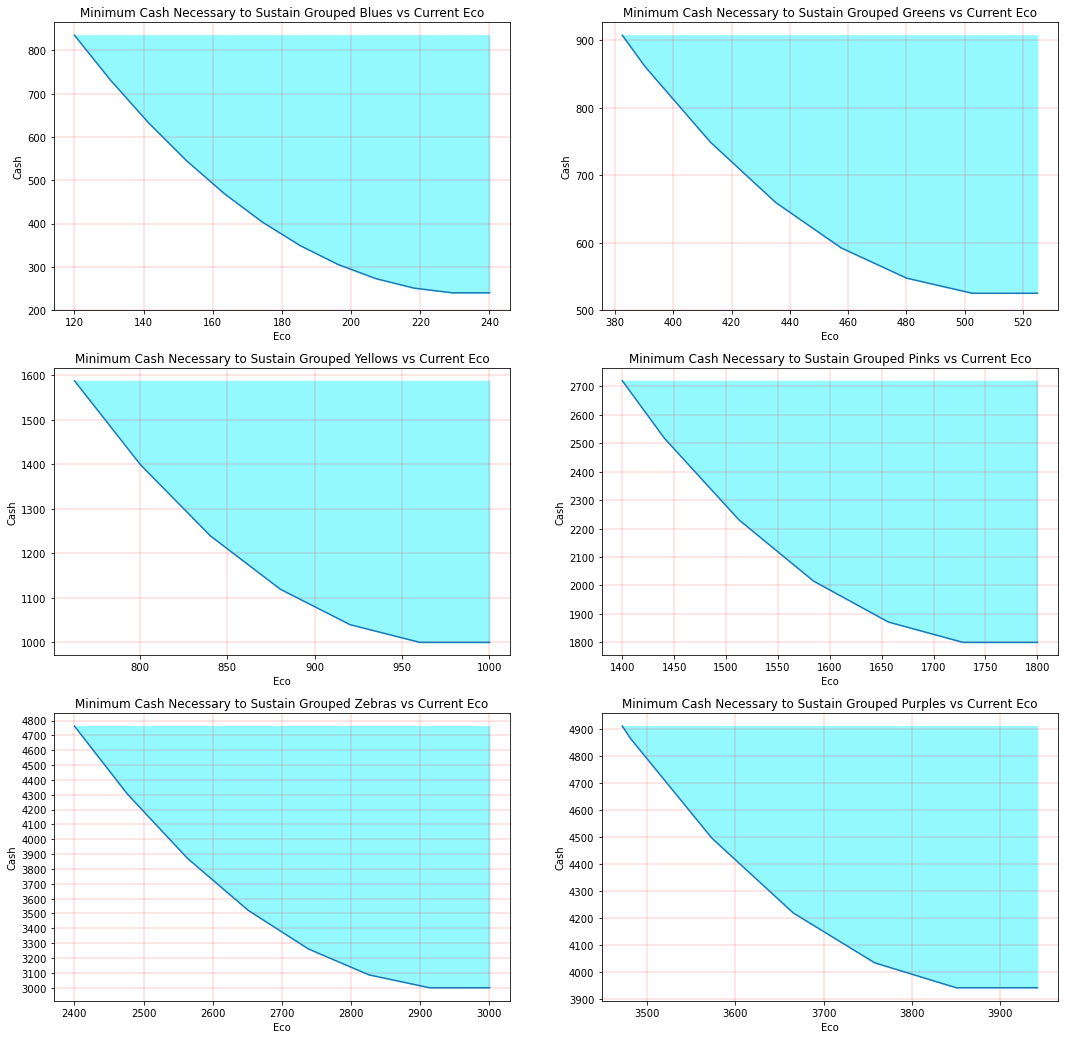

In [103]:
fig,ax = plt.subplots(int(np.ceil(len(S_cost_list)/2)), 2)

for i in range(len(S_cost_list)):
    q = int(np.mod(i,2))
    p = int(np.floor(i/2))
    
    #print("Current tuple: (" + str(p) + ", " + str(q) + ") ")
    
    N = 10000
    x_val = np.array([a[i] + (j/(N-1))*(b[i]-a[i]) for j in range(N)])
    y_val = cash_boundary(x_val,S_cost_list[i],S_eco_list[i])
    
    y_min = np.round(y_val[-1],-2)
    y_max = np.round(y_val[0],-2)
    ticks = int((y_max - y_min)/100)+1
    print(ticks)
    
    ax[p,q].plot(x_val, y_val)
    ax[p,q].set_title("Minimum Cash Necessary to Sustain " + S_names_list[i] + " vs Current Eco")
    ax[p,q].fill_between(x_val, y_val, y_val[0], color='#94f9ff')
    ax[p,q].set_yticks([y_min + (i/(ticks-1))*(y_max - y_min) for i in range(ticks)])
    ax[p,q].grid(color='r', linewidth=0.2)
    ax[p,q].set_ylabel("Cash")
    ax[p,q].set_xlabel("Eco")
    
fig.set_size_inches(18,18)


# The Nonsustainable Eco Formula

## Function Definitions

In [284]:
def eco_formula(t_0,t,C,E,S_cost,S_eco):
    
    #########################
    #Let's quickly handle the rare case where the time interval does not encompass any ticks
    #########################
    
    if t <= 6*np.ceil(t_0/6):
        scale_factor = np.min([(t-t_0)/6,C/S_cost])
        C = C - scale_factor*S_cost
        E = E + scale_factor*S_eco
        return C,E
    
    ##############################################
    #First, increment over the incomplete eco tick
    ##############################################
    
    scale_factor = np.min([np.ceil(t_0/6) - t_0/6, C/S_cost])
    C = C + E + scale_factor*(S_eco - S_cost)
    E = E + scale_factor*S_eco
    
#     print("After first tick:")
#     print("Cash: " + str(C))
#     print("Eco: " + str(E))

    #Now, compute L
    a = 0.5*S_eco
    b = E - S_cost - 0.5*S_eco
    c = C - S_cost
    
    disc = np.square(b) - 4*a*c
    if disc >= 0:
        L = 2 + np.floor((-1*b - np.sqrt(disc))/(2*a))
        sustainable = False
    else:
        #print("S is sustainable!")
        L = 1
        sustainable = True
    
    N = np.ceil(t/6) - np.ceil(t_0/6)
#     print("Value of N:")
#     print(N)
    
#     print("Current value of L: ")
#     print(L)
    
    if L > 1:
        inp = np.min([N,L])
        C = C + (E - S_cost)*(inp-1) + 0.5*(inp-1)*(inp)*S_eco
        E = E + (inp-1)*S_eco
    
#     print("Cash and eco is now:")
#     print("Cash: " + str(C))
#     print("Eco: " + str(E))
    
    if L >= N:
        sustainable = True    
    
    while sustainable == False: 
        E = E + (C/S_cost)*S_eco
        
        L = L+1
        #print(E)
        #Check either for whether L = N or that the send is sustainable
        if L == N:
            sustainable = True
            C = E
            break
        
        N_star = int(np.max(np.round((S_cost - E)/S_eco - 0.5,0),0))
        sus_bound = S_cost - (E - S_cost)*N_star - 0.5*S_eco*N_star*(N_star+1)
        
        if E >= sus_bound:
            sustainable = True
            C = E
    
    if L < N:
        C = C + (E - S_cost)*(N-L) + 0.5*(N-L)*(N-L+1)*S_eco
        E = E + (N - L)*S_eco
    
#     print("Cash and eco is now:")
#     print("Cash: " + str(C))
#     print("Eco: " + str(E))
    
    #Finally, compute the end cash and eco at the final time
    t_star = 6*np.ceil(t/6) - 6
    
    scale_factor = np.min([(t-t_star)/6,C/S_cost])
    C = C - scale_factor*S_cost
    E = E + scale_factor*S_eco
    
    return C,E
    

## Examples of the Formula

Text(0, 0.5, 'Cash')

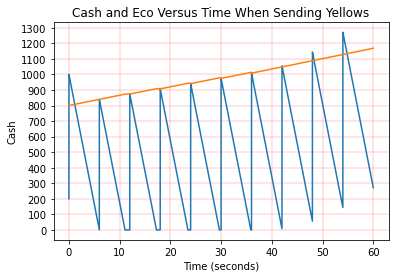

In [1007]:
t_0 = 0
t = 60
N = 10000

C = 200
E = 800
S_cost = 1000
S_eco = 40

t_val = np.array([t_0 + (i/(N-1))*(t - t_0) for i in range(N)])
y_val = np.array([eco_formula(t_0,t_val[i],C,E,S_cost,S_eco) for i in range(N)])

y_max = np.round(np.max(y_val),-2)
y_min = np.round(np.min(y_val),-2)
plt.plot(t_val,y_val)
ticks = int((y_max - y_min)/100)+1

#plt.fill_between(x_val, y_val, y_val[0], color='#94f9ff')
plt.yticks([y_min + (i/(ticks-1))*(y_max - y_min) for i in range(ticks)])
plt.grid(color='r', linewidth=0.2)
plt.title("Cash and Eco Versus Time When Sending Yellows")
plt.xlabel("Time (seconds)")
plt.ylabel("Cash")

# The Perfect Eco Formula

The conjectured perfect eco strategy is as follows:
1. Form a list of all nondominated eco sends and order them $S_0, \ldots, S_N$
2. Determine the highest integer $i$ such that $S_i$ is sustainable.
3. Eco using the eco send $S_{i+1}$ as much as possible, switching back to $S_i$ if you run low on money.

There are some cases where this strategy is known to be suboptimal, however, the strategy nonetheless describes optimal eco'ing in most scenarios and thus in this section follows code to determine the cash from this strategy, which I'll called from here on out the mixed eco strategy.

# The General Farm Formula

## Round Lengths

The numbers below are estimates from ninjayas. The entry in index $i$ in the r_stall (resp. r_antistall) array represents the length of round $i$ in a stalled (resp. antistalled) game. The times are estimates and may be a bit off.

In [107]:
filepath = r"C:\Users\bmost\OneDrive\Documents\BTD Battles 2\round_data_1_8.csv"
round_data = pd.read_csv(filepath)
round_data

,Round,Anti-Stall,Half-Stall,Full-Stall
0,0,6,6,6
1,1,21,23,28
2,2,20,22,30
3,3,21,23,32
4,4,26,33,40
5,5,24,21,41
6,6,20,21,32
7,7,20,32,39
8,8,18,21,28
9,9,17,19,33


In [108]:
r_anti = np.array(round_data['Anti-Stall'])
r_half = np.array(round_data['Half-Stall'])
r_stall = np.array(round_data['Full-Stall'])
send_times = r_anti - 4

#stall_factor = 1 implies a fully stalled game
#stall_factor = 0 implies a fully anti-stalled game
stall_factor = 0.5

## Function Defintions

In [109]:
def compute_round_lengths(stall_factor):
    if stall_factor <= 0.5:
        return 2*stall_factor*r_half + (1 - 2*stall_factor)*r_anti
    else:
        return 2*(stall_factor-0.5)*r_stall + (1 - 2*(stall_factor-0.5))*r_half

In [110]:
def current_round(t,stall_factor):
    #Determine the round we are currently on after t seconds of game time has elapsed given some stall factor
    r_lengths = compute_round_lengths(stall_factor)
    #print(r_lengths)
    
    val = 0
    i = 0
    while val <= t:
        val = val + r_lengths[i]
        i = i + 1
    return i-1

In [208]:
def T(t,stall_factor):
    #Given a time t that has passed in the game so far and some stall factor, 
    #determine the amount of time elapsed in the current round
    
    r_lengths = compute_round_lengths(stall_factor)
    
    return t - np.sum(r_lengths[0:current_round(t,stall_factor)])

In [273]:
def farm_payoff(t_0,t,t_p,p,k,stall_factor):
    
    r_lengths = compute_round_lengths(stall_factor)
    
    R_t = current_round(t,stall_factor)
    R_0 = current_round(t_0,stall_factor)
    R_p = current_round(t_p,stall_factor)
    
    #The farm follows a different payout schedule on the round it is purchased
    #versus future rounds, so we need to check if we need to account for that first or not
    
    if R_0 == R_p:
        #Determine the payout on the round that the farm was purchased
        val_1 = p*(np.ceil((k/send_times[R_p])*(np.min([t - np.sum(r_lengths[0:R_p]), send_times[R_p]]) - T(t_p, stall_factor))) - np.ceil((k/send_times[R_p])*(np.min([T(t_0,stall_factor), send_times[R_p]]) - T(t_p, stall_factor))))
        #print(val_1)
        
        if R_t > R_0:
            val_2 = p*np.ceil(k*np.min([T(t,stall_factor)/send_times[R_t],1]))
        else:
            val_2 = 0
        
        #print(val_2)
        
        val_3 = np.max([R_t - R_0 - 1,0])*p*k
        
        #print(val_3)
        
        if t > t_p and t_0 > t_p:
            val_4 = 0
        elif t > t_p and t_0 == t_p:
            val_4 = -1*p
        else:
            #This is a degenerate case which must yield zero
            return 0
        #print(val_4)
        val = val_1 + val_2 + val_3 + val_4
    else:
        #The case when the round of purhcase does not need to be considered is simpler
        val_1 = p*k*R_t + p*np.ceil(k*np.min([T(t,stall_factor)/send_times[R_t],1]))
        #print(val_1)
        val_2 = p*k*R_0 + p*np.ceil(k*np.min([T(t_0,stall_factor)/send_times[R_0],1]))
        #print(val_2)
        val = val_1 - val_2
    
    return val

## Example Problem 1: The 200 Farm

Consider the payout of a 200 farm over the course of one round:

In [274]:
stall_factor = 0.2
r_lengths = compute_round_lengths(stall_factor)
t_0 = np.sum(r_lengths[0:7])
t = np.sum(r_lengths[0:9])
t_p = t_0

farm_payoff(t_0,t,t_p,40,7,stall_factor)

520.0

## Example Problem 2: 205 Monkey Wall Street Payout

Here, I assume the Monkey Wall Street is purchased *just* before Round 20 and track its payout schedule to the end of Round 22.

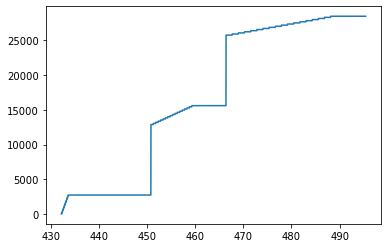

In [275]:
stall_factor = 0.2
r_lengths = compute_round_lengths(stall_factor)
t_0 = np.sum(r_lengths[0:20])
t = np.sum(r_lengths[0:23])
t_p = t_0

N = 10000

t_val = [t_0 + (i/(N-1))*(t - t_0) for i in range(N)]
y_val = []

for i in range(N):
    v1 = farm_payoff(t_0,t_val[i],t_p,10000,1,stall_factor)
    v2 = farm_payoff(t_0,t_val[i],t_p,160,18,stall_factor)
    y_val.append(v1 + v2)
    
plt.plot(t_val,y_val)

# Payoff Of An Arbitrary Farm Flowchart

Let's now use the formulas for eco payoff and farm payoff defined earlier to determine the wealth from a given farm build at an arbitrary time. 

In [347]:
def payoff(t_0,t,C,E,S_cost,S_eco,farm_payments, farm_frequencies, farm_buytimes, stall_factor):
    
    val = []
    eco_val = eco_formula(t_0,t,C,E,S_cost,S_eco)[0]
    val.append(eco_val)
    
    for i in range(len(farm_payments)):
        val.append(farm_payoff(t_0,t, farm_buytimes[i], farm_payments[i], farm_frequencies[i], stall_factor))
    
    return np.sum(np.array(val))

In [356]:
def payoff_time_bisection(target, t_0,C,E,S_cost,S_eco,farm_payments, farm_frequencies, farm_buytimes, stall_factor, iterations = 25):
    #Use the bisection method to determine the minimum time it will take for a strategy to reach
    #a specified amount of money
    
    if S_eco > 0:
        N = 0
        #N_lim = np.max([np.ceil((S_cost - E)/S_eco),0])
        N_lim = np.ceil(0.5*(np.sum(r_game) - t_0)/6)
        #print(N_lim)
        test_val = t_0
        while payoff(t_0,test_val,C,E,S_cost,S_eco,farm_payments, farm_frequencies, farm_buytimes, stall_factor) < target and N < N_lim:
            print(payoff(t_0,test_val,C,E,S_cost,S_eco,farm_payments, farm_frequencies, farm_buytimes, stall_factor))
            if N == 0:
                test_val = 6*np.ceil(t_0/6) + 0.01
            else:
                test_val = test_val + 6
            N = N + 1
        #print(test_val)
        if payoff(t_0,test_val,C,E,S_cost,S_eco,farm_payments, farm_frequencies, farm_buytimes, stall_factor) >= target:
            a = np.max([test_val - 6,t_0])
            b = test_val
        else:
            a = test_val
            b = t_0 + 0.5*(np.sum(r_game) - t_0)
    else:
        a = t_0
        b = t_0 + 0.5*(np.sum(r_game) - t_0)
        
    print("Picked (" + str(a) +  ", " +str(b) + ") for the interval.")
    
    for i in range(iterations):
        c = 0.5*(a+b)
        
        if (payoff(t_0,c, C,E, S_cost, S_eco, farm_payments, farm_frequencies, farm_buytimes, stall_factor) - target)*(payoff(t_0,b, C,E, S_cost, S_eco, farm_payments, farm_frequencies, farm_buytimes, stall_factor) - target) > 0:
            b = c
        else:
            a = c
            
    return c

## Example Case #1 - 2 x 320 + Infinite Yellow Eco

Assume we are just beginning round 13 and have 2 x 320 farm to our name

In [364]:
#Determining the round lengths as a function of stall
stall_factor = 0.2
r_game = compute_round_lengths(stall_factor)

t_0 = np.sum(r_game[0:13])

#Our cash and eco at t_0
C = 2700
E = 800

#The specifications of the eco send we're using
S_cost = 1000
S_eco = 40

#Specification of the farms that we have
farm_payments = [50,50]
farm_frequencies = [16,16]
farm_buytimes = [t_0-0.1, t_0-0.1]

In [369]:
a = np.sum(r_game[0:13])
b = np.sum(r_game[0:16])+15
N = 10000

t_val = np.array([a + (i/(N-1))*(b-a) for i in range(N)])
y_val = [payoff(t_0,t_val[i],C,E,S_cost,S_eco,farm_payments, farm_frequencies, farm_buytimes, stall_factor) for i in range(N)]


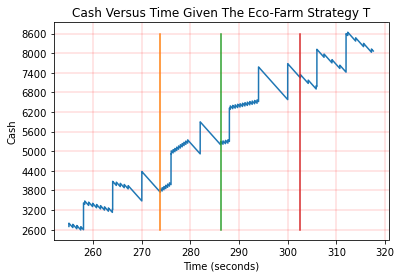

In [373]:
plt.plot(t_val,y_val)
plt.title("Cash Versus Time Given The Eco-Farm Strategy T")
plt.xlabel("Time (seconds)")
plt.ylabel("Cash")

y_min = np.round(np.max(y_val),-2)
y_max = np.round(np.min(y_val),-2)
plt.plot([np.sum(r_game[0:14]),np.sum(r_game[0:14])] ,[y_min,y_max])
plt.plot([np.sum(r_game[0:15]),np.sum(r_game[0:15])] ,[y_min,y_max])
plt.plot([np.sum(r_game[0:16]),np.sum(r_game[0:16])] ,[y_min,y_max])


ticks = 11
#plt.fill_between(x_val, y_val, y_val[0], color='#94f9ff')
plt.yticks([y_min + (i/(ticks-1))*(y_max - y_min) for i in range(ticks)])
plt.grid(color='r', linewidth=0.2)

In [374]:
payoff_time_bisection(5650+1000, t_0,C,E,S_cost,S_eco,farm_payments, farm_frequencies, farm_buytimes, stall_factor, 25)

2700.0
3418.333333333335
4078.333333333335
4378.333333333335
4918.333333333335
5898.333333333335
6318.333333333335
Picked (288.01, 294.01) for the interval.


293.9999998307228

## Example Case #2: The MWS Flowchart

Let's expand upon Example Case 1 by now charting the entire MWS flow chart. I will assume that we perform grouped yellow eco up until a certain point. For a description of the procedure being performed here, we refer the reader to the paper.

In [599]:
#Determining the round lengths as a function of stall
stall_factor = 0.2
r_game = compute_round_lengths(stall_factor)
t_0 = np.sum(r_game[0:13])

#Our cash and eco at t_0
C = 2300
E = 980

#The specifications of the eco send we're using
S_cost = 1040
S_eco = 41.6

#Specification of the farms that we have
farm_payments = [50,50]
farm_frequencies = [16,16]

In [600]:
a = np.sum(r_game[0:13])
b = np.sum(r_game[0:16])+15
N = 10000

t_val = np.array([a + (i/(N-1))*(b-a) for i in range(N)])
y_val = [payoff(t_0,t_val[i],C,E,S_cost,S_eco,farm_payments, farm_frequencies, stall_factor) for i in range(N)]

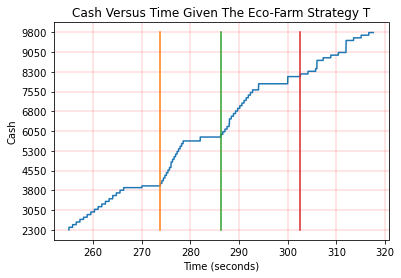

In [601]:
plt.plot(t_val,y_val)
plt.title("Cash Versus Time Given The Eco-Farm Strategy T")
plt.xlabel("Time (seconds)")
plt.ylabel("Cash")

y_min = np.round(y_val[-1],-2)
y_max = np.round(y_val[0],-2)

plt.plot([np.sum(r_game[0:14]),np.sum(r_game[0:14])] ,[y_min,y_max])
plt.plot([np.sum(r_game[0:15]),np.sum(r_game[0:15])] ,[y_min,y_max])
plt.plot([np.sum(r_game[0:16]),np.sum(r_game[0:16])] ,[y_min,y_max])

ticks = 11
#plt.fill_between(x_val, y_val, y_val[0], color='#94f9ff')
plt.yticks([y_min + (i/(ticks-1))*(y_max - y_min) for i in range(ticks)])
plt.grid(color='r', linewidth=0.2)

Our first major step in the flowchart is to afford the 203 farm, which costs 5650 to afford. Once we buy this upgrade, we will stop eco'ing, so we just need to wait until we have enough money for the upgrade.

In [603]:
t_1 = payoff_time_bisection(5650,t_0,C,E,S_cost,S_eco,farm_payments, farm_frequencies, stall_factor, 25)
t_1

278.48750449717045

Our next step is to afford a second 203 farm. At this point, we need to update our cash, eco, and farm arrangement before plugging into the payoff function.

In [611]:
#Our cash and eco at t_1
C = 0
E = E + (t_1 - t_0)*(S_eco/6)

#The specifications of the eco send we're using
S_cost = 0
S_eco = 0

#Specification of the farms that we have
farm_payments = [50,50,40]
farm_frequencies = [16,16,18]

In [612]:
a = t_1
b = np.sum(r_game[0:16])+15
N = 10000

t_val = np.array([a + (i/(N-1))*(b-a) for i in range(N)])
y_val = [payoff(t_1,t_val[i],C,E,S_cost,S_eco,farm_payments, farm_frequencies, stall_factor) for i in range(N)]

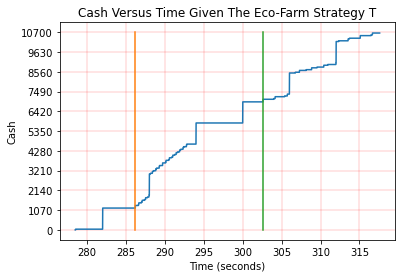

In [613]:
plt.plot(t_val,y_val)
plt.title("Cash Versus Time Given The Eco-Farm Strategy T")
plt.xlabel("Time (seconds)")
plt.ylabel("Cash")

y_min = np.round(y_val[-1],-2)
y_max = np.round(y_val[0],-2)

plt.plot([np.sum(r_game[0:15]),np.sum(r_game[0:15])] ,[y_min,y_max])
plt.plot([np.sum(r_game[0:16]),np.sum(r_game[0:16])] ,[y_min,y_max])

ticks = 11
#plt.fill_between(x_val, y_val, y_val[0], color='#94f9ff')
plt.yticks([y_min + (i/(ticks-1))*(y_max - y_min) for i in range(ticks)])
plt.grid(color='r', linewidth=0.2)

In [617]:
t_2 = payoff_time_bisection(5650,t_1,C,E,S_cost,S_eco,farm_payments, farm_frequencies, stall_factor, 25)
t_2

294.00000615329435

The graphs are a nice visualizer for the problem so far, but we'll need to ditch them to compute compactly the money.

In [634]:
stall_factor = 0.2
r_game = compute_round_lengths(stall_factor)

C = [2300,0,0,0,0]
E = 980

S_cost = [1040,0,0,0,0]
S_eco = [41.6,0,0,0,0]

farm_payments = []
farm_payments.append([50,50])
farm_payments.append([50,50,40])
farm_payments.append([50,50,40,40])
farm_payments.append([50,50,40,160])
farm_payments.append([50,50,160,160])

farm_frequencies = []
farm_frequencies.append([16,16])
farm_frequencies.append([16,16,18])
farm_frequencies.append([16,16,18,18])
farm_frequencies.append([16,16,18,18])
farm_frequencies.append([16,16,18,18])

target = [5650,5650,13000,13000,20460]

t = []
t.append(np.sum(r_game[0:13]))

In [635]:
for i in range(5):
    t.append(payoff_time_bisection(target[i],t[i],C[i],E,S_cost[i],S_eco[i],farm_payments[i], farm_frequencies[i], stall_factor, 25))
    E = E + (t[-1] - t[-2])*(S_eco[i]/6)
t

[255.0,
 278.48750449717045,
 294.00000615329435,
 341.9999997551141,
 377.99999612908823,
 420.333331317394]

In [636]:
np.sum(r_game[0:20])

432.20000000000005